#Importing *Libraries*

In [7]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image, ImageDraw, ImageFont, ImageFilter
import arabic_reshaper
from bidi.algorithm import get_display
import pandas as pd
import string
import re
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import emoji
%matplotlib inline

# Load the *dataset*

In [8]:
df = pd.read_csv('ArabicText.csv')
df.head()

,text,class
0,﻿ اعتقل اندونيسي من قبل الشرطة بعد ان اثار جدل...,religon
1,﻿ عمان - الراي - اكد المهندس نضال الحديد امين ...,env
2,(2) امه هي امنه بنت وهب بن عبد مناف بن زهره بن...,religon
3,(ناسا) لتركيب نظام قياسي ضوئي شمسي طيفي لرصد ا...,ST
4,@ 3drees: حماقي حلف بالله انه ما يستمتع الا مع...,art


# Text pre-processing

The first step is to subject the data to preprocessing.
This involves removing both arabic and english punctuation.
Normalizing different letter variants with one common letter.

First  define a list of arabic and english punctiations that we want to get rid of in our text


In [9]:
punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ''' + string.punctuation

Arabic stop words


In [10]:
stop_words= set(['أو','','','فى', 'في', 'كل', 'لم', 'لن', 'له', 'من', 'هو', 'هي', 'قوة', 'كما', 'لها', 'منذ', 'وقد', 'ولا', 'لقاء', 'مقابل', 'هناك', 'وقال', 'وكان', 'وقالت', 'وكانت', 'فيه', 'لكن', 'وفي', 'ولم', 'ومن', 'وهو', 'وهي', 'يوم', 'فيها', 'منها', 'يكون', 'يمكن', 'حيث', 'االا', 'اما', 'االتى', 'التي', 'اكثر', 'ايضا', 'الذى', 'الذي', 'الان', 'الذين', 'ابين', 'ذلك', 'دون', 'حول', 'حين', 'الى', 'انه', 'اول', 'انها', 'ف', 'و', 'و6', 'قد', 'لا', 'ما', 'مع', 'هذا', 'واحد', 'واضاف', 'واضافت', 'فان', 'قبل', 'قال', 'كان', 'لدى', 'نحو', 'هذه', 'وان', 'واكد', 'كانت', 'واوضح', 'ب', 'ا', 'أ', '،', 'عن', 'عند', 'عندما', 'على', 'عليه', 'عليها', 'تم', 'ضد', 'بعد', 'بعض', 'حتى', 'اذا', 'احد', 'بان', 'اجل', 'غير', 'بن', 'به', 'ثم', 'اف', 'ان', 'او', 'اي', 'بها', 'إلى','أن'])

In [11]:
arabic_diacritics = re.compile("""
                             ّ    | # Shadda
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)

In [12]:
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

In [13]:
def preprocess(text):
    
    '''
    text is an arabic string input
    
    the preprocessed text is returned
    '''
    
    #remove punctuations
    translator = str.maketrans('', '', punctuations)
    text = text.translate(translator)
    
    # remove Tashkeel
    text = re.sub(arabic_diacritics, '', text)
    
    #remove longation
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)

    text = ' '.join(word for word in text.split() if word not in stop_words)

    #remove english
    text = "".join([char for char in text if char not in string.ascii_letters]).strip()

    #remove emoji
    text = emoji_pattern.sub(r'', text)

    #remove numbers
    text = ''.join([i for i in text if not i.isdigit()])
    return text

In [14]:
df['text'] = df['text'].apply(preprocess)
df.head(5)

,text,class
0,اعتقل اندونيسي الشرطه اثار جدلا بقوله تلاوه ا...,religon
1,عمان الراي اكد المهندس نضال الحديد امين عمان ...,env
2,امه امنه بنت وهب عبد مناف زهره كلاب مره ويتصل...,religon
3,ناسا لتركيب نظام قياسي ضوءي شمسي طيفي لرصد الت...,ST
4,حماقي حلف بالله يستمتع الا الجمهور السعودي فق...,art


In [15]:
df.to_csv('CleanedArabicText.csv')

# Data Visualization

Count the occurances of each word in dataframe

In [16]:
from collections import Counter
results = Counter()
# spliting by space, use regExp or another tokenizer
df['text'].str.split().apply(results.update)
CountData = pd.DataFrame([[k,results[k]] for k in results],)
CountData.columns = ['word','counts']

In [17]:
CountData[:20]

,word,counts
0,اعتقل,1
1,اندونيسي,1
2,الشرطه,4
3,اثار,8
4,جدلا,1
5,بقوله,20
6,تلاوه,1
7,القران,13
8,عمان,66
9,الراي,5


In [18]:
CountDataSorted = CountData.sort_values(['counts'],ascending=False)
CountDataSorted = CountDataSorted.set_index('word')

In [19]:
CountDataSorted[:20]

,counts
word,
علي,1604
راغب,935
السيسي,858
عمرو,858
دياب,847
علامه,842
الي,752
الفضاء,629
ليبيا,436


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8419 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8419 missing from current font.
  font.set_text(s, 0, flags=flags)


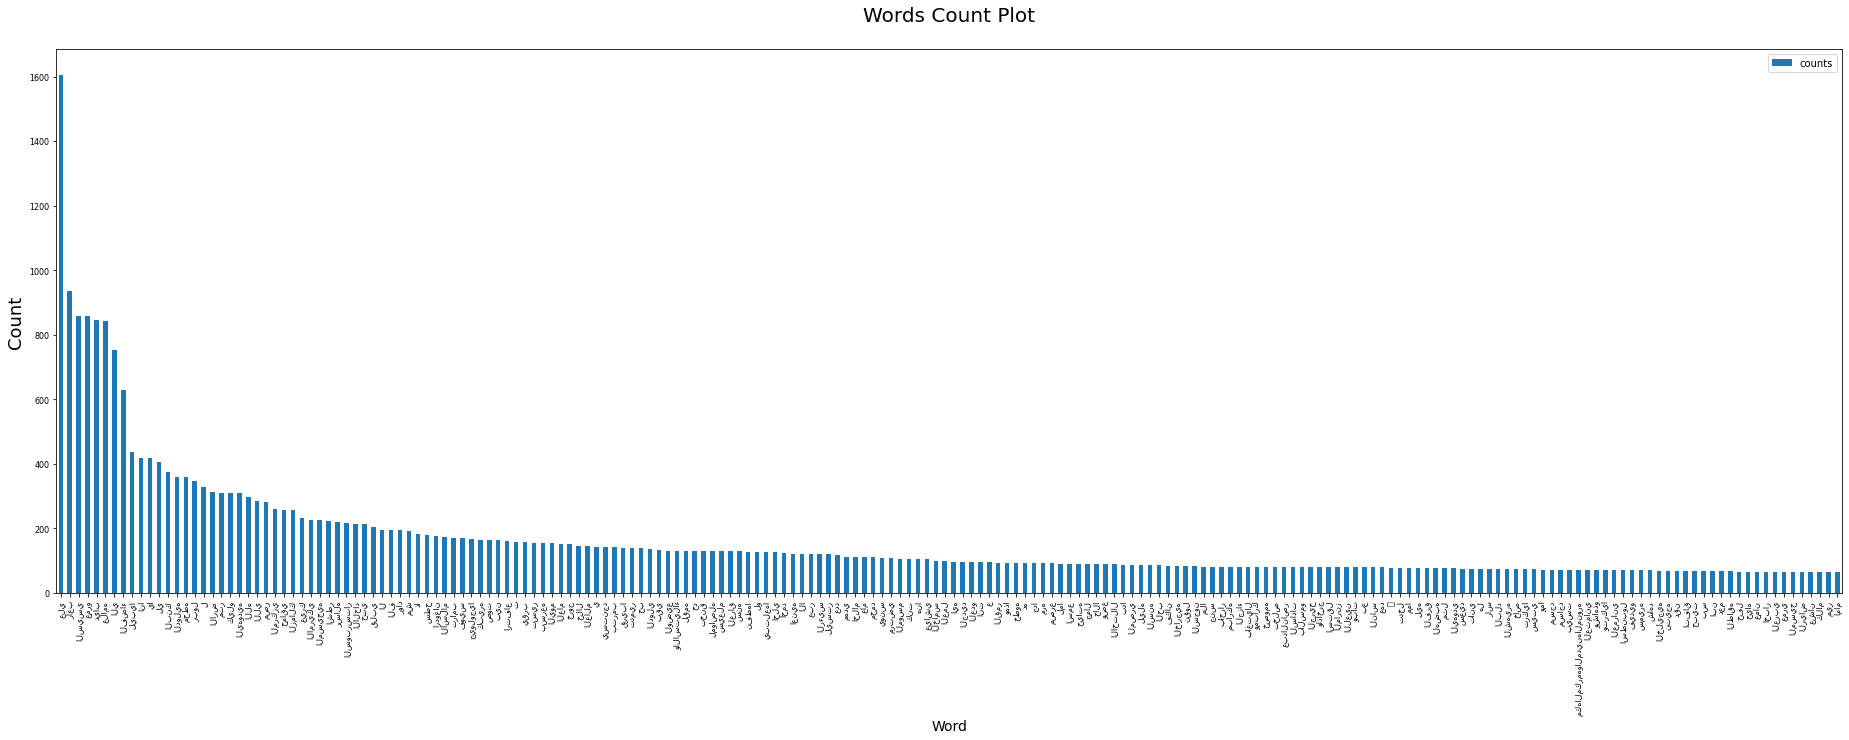

In [20]:
%matplotlib inline
ax = CountDataSorted[:200].plot(kind='bar', fontsize=8, figsize=(32,10))
ax.set_title('Words Count Plot\n', fontsize=20)
ax.set_xlabel('Word', fontsize=14)
ax.set_ylabel('Count', fontsize=18);

In [21]:
# Join the text and target labels in a list
text_and_labels = list(zip(df['text'], df['class']))
classes = set(df['class'])
class_text = {}
# for every element in the list
for index, (text, label) in enumerate(text_and_labels[:40]):
    print(index,text[:50],label)
    if(label in class_text):
        class_text[label] += ' '+ text
    else:
        class_text[label] = text

0  اعتقل اندونيسي الشرطه اثار جدلا بقوله تلاوه القرا religon
1  عمان الراي اكد المهندس نضال الحديد امين عمان علي  env
2  امه امنه بنت وهب عبد مناف زهره كلاب مره ويتصل نسب religon
3 ناسا لتركيب نظام قياسي ضوءي شمسي طيفي لرصد التلوث  ST
4  حماقي حلف بالله يستمتع الا الجمهور السعودي فقال ب art
5  حماقي حلف بالله يستمتع الا الجمهور السعودي فقال ب art
6  طلعو اغنيه حماقي راسي ياستار قلبي ولع نار نار دنا art
7 الحين هذي كيف تطلع مخي ياستار قلبي ولع نار  حماقي  art
8 الحين هذي كيف تطلع مخي ياستار قلبي ولع نار  حماقي  art
9 ظل القمر علي الارض فوق اجزاء ماليزيا الفلبين محطه  ST
10 اصعب شء عمله دايك النهارده    لي ربول لي ربول ليست pol
11 انا ماكنش الحب عمره نيتي وانا معاك غيرت رايي وفكرت art
12 انا اللي قلبي ولع ناررر   حماقي  art
13  انا لما اذاكر اخترع اشياء جديده  حماقي  قولوا بجي art
14 الذوق الموسيقي الجوزاءي يفوز    راغب علامه art
15             اولا كنت اقول فقط كتبت تعليق اكن ابحث  religon
16             احترامي لك يتفقوا علي مردغه انف ايران  religon
17 يلا يا كذاب  السيسي بيقول للست ال

In [22]:
class_text.keys()

dict_keys(['religon', 'env', 'ST', 'art', 'pol', 'fin'])

religon 923


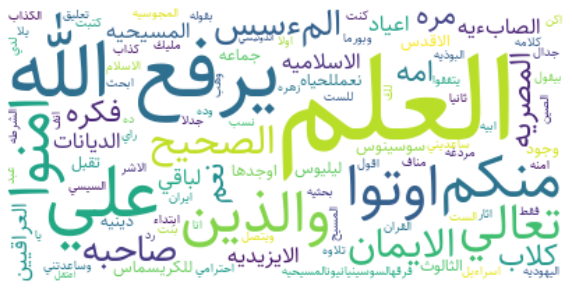

env 67


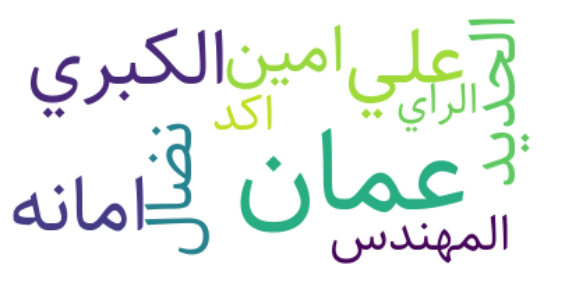

ST 224


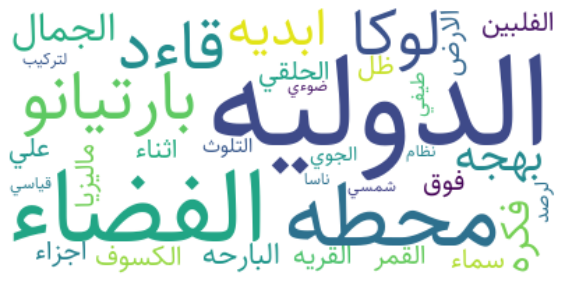

art 1405


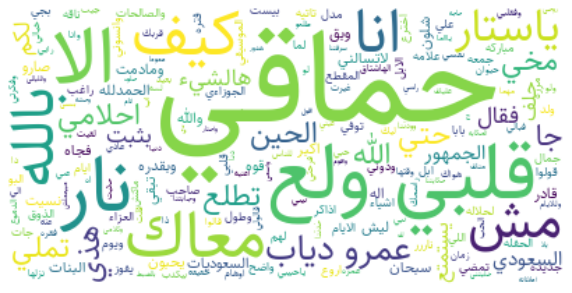

pol 761


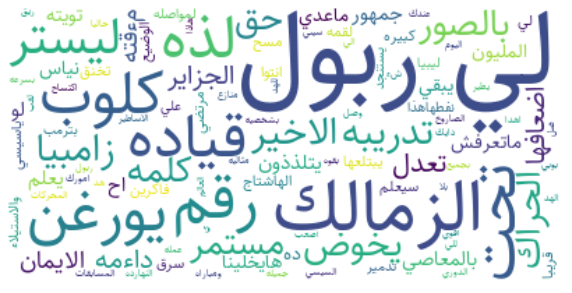

fin 1485


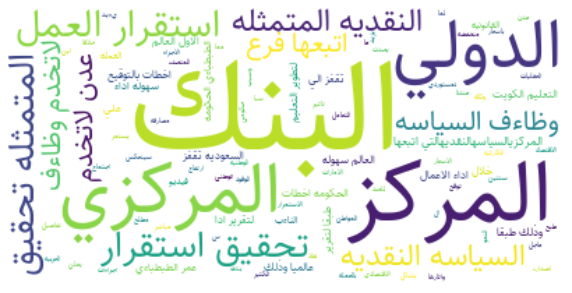

In [23]:
# Generate a word cloud image
wc = WordCloud(background_color="white", max_words=1000, 
               font_path='font.ttf',
               collocations=True,
               stopwords=stop_words, contour_width=1, contour_color='firebrick')


for cl in class_text:
    print(cl, len(class_text[cl]))
    unicode_text= class_text[cl]
    unicode_text = ' '.join([w for w in unicode_text.split() if w not in stop_words])
    reshaped_text = arabic_reshaper.reshape(unicode_text)    # correct its shape
    bidi_text = get_display(reshaped_text) 

    # Generate a wordcloud
    wc.generate(bidi_text)

    # show
    plt.figure(figsize=[10,10])
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

Extract the top 50 words for each class
'religon', 'env', 'ST', 'art', 'pol', 'fin'

In [24]:
from collections import Counter
results = Counter()

religon = df[df['class']=='religon']
religon['text'].str.split().apply(results.update)
CountData = pd.DataFrame([[k,results[k]] for k in results],)
CountData.columns = ['word','counts']
CountDataSorted = CountData.sort_values(['counts'],ascending=False)
CountDataSorted = CountDataSorted.set_index('word')
CountDataSorted[:50]

,counts
word,
علي,351
اليهوديه,307
المسيحيه,227
الالحاد,215
الله,178
الامريكي,162
الي,140
انا,129
العراق,125


In [25]:
from collections import Counter
results = Counter()

env = df[df['class']=='env']
env['text'].str.split().apply(results.update)
CountData = pd.DataFrame([[k,results[k]] for k in results],)
CountData.columns = ['word','counts']
CountDataSorted = CountData.sort_values(['counts'],ascending=False)
CountDataSorted = CountDataSorted.set_index('word')
CountDataSorted[:50]


,counts
word,
علي,208
الي,149
الارض,82
الماء,57
القمر,45
الشمس,37
البترول,32
بين,32
مثل,32


In [26]:
from collections import Counter
results = Counter()

ST = df[df['class']=='ST']
ST['text'].str.split().apply(results.update)
CountData = pd.DataFrame([[k,results[k]] for k in results],)
CountData.columns = ['word','counts']
CountDataSorted = CountData.sort_values(['counts'],ascending=False)
CountDataSorted = CountDataSorted.set_index('word')
CountDataSorted[:50]

,counts
word,
الفضاء,623
الدوليه,360
محطه,359
علي,338
كيلو,303
متر,303
الارض,222
رواد,187
جيولوجيا,167


In [27]:
from collections import Counter
results = Counter()

art = df[df['class']=='art']
art['text'].str.split().apply(results.update)
CountData = pd.DataFrame([[k,results[k]] for k in results],)
CountData.columns = ['word','counts']
CountDataSorted = CountData.sort_values(['counts'],ascending=False)
CountDataSorted = CountDataSorted.set_index('word')
CountDataSorted[:50]

,counts
word,
راغب,935
عمرو,851
دياب,846
علامه,839
انا,260
حماقي,258
علي,246
غيرك,230
اشطر,222


In [28]:
from collections import Counter
results = Counter()

Pol = df[df['class']=='pol']
Pol['text'].str.split().apply(results.update)
CountData = pd.DataFrame([[k,results[k]] for k in results],)
CountData.columns = ['word','counts']
CountDataSorted = CountData.sort_values(['counts'],ascending=False)
CountDataSorted = CountDataSorted.set_index('word')
CountDataSorted[:50]

,counts
word,
السيسي,855
ليبيا,419
علي,405
لي,363
ربول,346
الزمالك,258
مصر,214
اردوغان,176
ترامب,172


In [29]:
from collections import Counter
results = Counter()

fin = df[df['class']=='fin']
fin['text'].str.split().apply(results.update)
CountData = pd.DataFrame([[k,results[k]] for k in results],)
CountData.columns = ['word','counts']
CountDataSorted = CountData.sort_values(['counts'],ascending=False)
CountDataSorted = CountDataSorted.set_index('word')
CountDataSorted[:50]

,counts
word,
البنك,374
المركزي,259
الي,194
رساله,162
الدولي,71
علي,56
ساءرون,54
الفتح,54
خلال,34
